In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

In [2]:
rr = pd.read_csv('time_series_19-covid-Recovered.csv', sep=',')
rr2 = rr.set_index(['Country/Region','Province/State'])
rr2.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,0,0,0,0,2,2,5,5,...,31,31,31,33,34,34,35,35,35,35
Japan,NaN,36.0000,138.0000,0,0,0,0,1,1,1,1,...,76,76,76,101,118,118,118,118,118,144
Singapore,NaN,1.2833,103.8333,0,0,0,0,0,0,0,0,...,78,78,78,78,96,96,97,105,105,109


In [3]:
# read csv:
#df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=';', index_col=0,keep_default_na=False).T
df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=',')
# re-set the index (row headers):
df2 = df.set_index(['Country/Region','Province/State'])
df2.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,2,3,5,7,8,8,14,14,...,50,50,50,53,59,70,75,82,114,147
Japan,NaN,36.0000,138.0000,2,1,2,2,4,4,7,7,...,461,502,511,581,639,639,701,773,839,825
Singapore,NaN,1.2833,103.8333,0,1,3,3,4,5,7,7,...,138,150,150,160,178,178,200,212,226,243


In [4]:
dfX = df2-rr2
dfX.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,1,4,4,5,7,7,7,11,16,20
Albania,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,2,10,12,23,33,38,42,51
Algeria,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,17,19,20,20,20,16,18,25,36,42


In [5]:
#remove spurious last column:
df2b = dfX.loc[:, ~df2.columns.str.contains('^Unnamed')]
# transpose:
df3 = df2b.T
df3.head(5)

Country/Region Afghanistan Albania Algeria Andorra Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN                 NaN   
Lat                    0.0     0.0     0.0     0.0                 0.0   
Long                   0.0     0.0     0.0     0.0                 0.0   
1/22/20                0.0     0.0     0.0     0.0                 0.0   
1/23/20                0.0     0.0     0.0     0.0                 0.0   
1/24/20                0.0     0.0     0.0     0.0                 0.0   

Country/Region Argentina Armenia Aruba                    Australia  \
Province/State       NaN     NaN   NaN Australian Capital Territory   
Lat                  0.0     0.0   0.0                          0.0   
Long                 0.0     0.0   0.0                          0.0   
1/22/20              0.0     0.0   0.0                          0.0   
1/23/20              0.0     0.0   0.0                          0.0   
1/24/20              0.0     0.0   0.0                          0.0   

Country/Region                        ... United Arab Emirates United Kingdom  \
Province/State From Diamond Princess  ...                  NaN Cayman Islands   
Lat                              0.0  ...                  0.0            0.0   
Long                             0.0  ...                  0.0            0.0   
1/22/20                          0.0  ...                  0.0            0.0   
1/23/20                          0.0  ...                  0.0            0.0   
1/24/20                          0.0  ...                  0.0            0.0   

Country/Region                                          Uruguay Uzbekistan  \
Province/State Channel Islands Gibraltar United Kingdom     NaN        NaN   
Lat                        0.0       0.0            0.0     0.0        0.0   
Long                       0.0       0.0            0.0     0.0        0.0   
1/22/20                    0.0       0.0            0.0     0.0        0.0   
1/23/20                    0.0       0.0            0.0     0.0        0.0   
1/24/20                    0.0       0.0            0.0     0.0        0.0   

Country/Region Venezuela Vietnam occupied Palestinian territory  
Province/State       NaN     NaN                            NaN  
Lat                  0.0     0.0                            0.0  
Long                 0.0     0.0                            0.0  
1/22/20              0.0     0.0                            0.0  
1/23/20              0.0     2.0                            0.0  
1/24/20              0.0     2.0                            0.0  

[5 rows x 463 columns]

In [6]:
# remove Lat/Long rows
df4 = df3.drop(['Lat','Long'])
df4.tail(3)

Country/Region Afghanistan Albania Algeria Andorra Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN                 NaN   
3/14/20               11.0    38.0    25.0     0.0                 1.0   
3/15/20               16.0    42.0    36.0     0.0                 1.0   
3/16/20               20.0    51.0    42.0     1.0                 1.0   

Country/Region Argentina Armenia Aruba                    Australia  \
Province/State       NaN     NaN   NaN Australian Capital Territory   
3/14/20             33.0    18.0   2.0                          1.0   
3/15/20             44.0    26.0   2.0                          1.0   
3/16/20             55.0    52.0   2.0                          2.0   

Country/Region                        ... United Arab Emirates United Kingdom  \
Province/State From Diamond Princess  ...                  NaN Cayman Islands   
3/14/20                          0.0  ...                 68.0            1.0   
3/15/20                          0.0  ...                 75.0            1.0   
3/16/20                          0.0  ...                 75.0            1.0   

Country/Region                                          Uruguay Uzbekistan  \
Province/State Channel Islands Gibraltar United Kingdom     NaN        NaN   
3/14/20                    2.0       0.0         1122.0     4.0        0.0   
3/15/20                    3.0       0.0         1122.0     4.0        1.0   
3/16/20                    6.0       0.0         1523.0     8.0        6.0   

Country/Region Venezuela Vietnam occupied Palestinian territory  
Province/State       NaN     NaN                            NaN  
3/14/20              2.0    37.0                            0.0  
3/15/20             10.0    40.0                            0.0  
3/16/20             17.0    45.0                            0.0  

[3 rows x 463 columns]

In [7]:
# convert index to dateTime:
df4.index = pd.DatetimeIndex(df4.index)
df4.head(3)

Country/Region Afghanistan Albania Algeria Andorra Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN                 NaN   
2020-01-22             0.0     0.0     0.0     0.0                 0.0   
2020-01-23             0.0     0.0     0.0     0.0                 0.0   
2020-01-24             0.0     0.0     0.0     0.0                 0.0   

Country/Region Argentina Armenia Aruba                    Australia  \
Province/State       NaN     NaN   NaN Australian Capital Territory   
2020-01-22           0.0     0.0   0.0                          0.0   
2020-01-23           0.0     0.0   0.0                          0.0   
2020-01-24           0.0     0.0   0.0                          0.0   

Country/Region                        ... United Arab Emirates United Kingdom  \
Province/State From Diamond Princess  ...                  NaN Cayman Islands   
2020-01-22                       0.0  ...                  0.0            0.0   
2020-01-23                       0.0  ...                  0.0            0.0   
2020-01-24                       0.0  ...                  0.0            0.0   

Country/Region                                          Uruguay Uzbekistan  \
Province/State Channel Islands Gibraltar United Kingdom     NaN        NaN   
2020-01-22                 0.0       0.0            0.0     0.0        0.0   
2020-01-23                 0.0       0.0            0.0     0.0        0.0   
2020-01-24                 0.0       0.0            0.0     0.0        0.0   

Country/Region Venezuela Vietnam occupied Palestinian territory  
Province/State       NaN     NaN                            NaN  
2020-01-22           0.0     0.0                            0.0  
2020-01-23           0.0     2.0                            0.0  
2020-01-24           0.0     2.0                            0.0  

[3 rows x 463 columns]

In [8]:
# extract regions we are interested in:
df6 = df4.loc[:,[
    ('China','Hubei'),
    ('China','Beijing'),
    ('Germany',''),
    ('Italy',''),
    ('Japan',''),
    ('France','France'),
#    ('China','Anhui'),
    ('Switzerland',''),
    ('Singapore',''),
    ('Korea, South',''),
    ('Poland',''),
    ("US","Washington"),
    ("Spain",""),
    ("Austria","")
]]
df6.tail(3)

Country/Region    China         Germany    Italy  Japan  France Switzerland  \
Province/State    Hubei Beijing     NaN      NaN    NaN  France         NaN   
2020-03-14      14830.0    88.0  4539.0  19191.0  655.0  4457.0      1355.0   
2020-03-15      13506.0    89.0  5749.0  22412.0  721.0  4487.0      2196.0   
2020-03-16      12656.0    92.0  7205.0  25231.0  681.0  6621.0      2196.0   

Country/Region Singapore Korea, South Poland         US   Spain Austria  
Province/State       NaN          NaN    NaN Washington     NaN     NaN  
2020-03-14         107.0       7576.0  103.0      571.0  5874.0   649.0  
2020-03-15         121.0       7652.0  119.0      642.0  7281.0   854.0  
2020-03-16         134.0       7099.0  164.0      903.0  9412.0  1012.0

In [9]:
# divide by population density.  first had this via separate csv files, 
# but the "countries" are not stable in the upstream data
df6.loc[:,('China','Beijing')] /= 22.
df6.loc[:,('China','Hubei')] /= 60.
df6.loc[:,('Japan',np.nan)] /= 126.8
df6.loc[:,('Korea, South',np.nan)] /= 52.
df6.loc[:,('Singapore',np.nan)] /= 5.85
df6.loc[:,('France','France')] /= 67.
df6.loc[:,('Germany',np.nan)] /= 82.79
df6.loc[:,('Italy',np.nan)] /= 60.5
df6.loc[:,('Switzerland',np.nan)] /= 8.57
df6.loc[:,('Poland',np.nan)] /= 4.
df6.loc[:,('US','Washington')] /= 7.6
#df6.loc[:,("US","King County, WA")] /= 2.2
df6.loc[:,("Spain",np.nan)] /= 47.
df6.loc[:,("Austria",np.nan)] /= 8.8
df6.tail(3)

Country/Region       China              Germany       Italy     Japan  \
Province/State       Hubei   Beijing        NaN         NaN       NaN   
2020-03-14      247.166667  4.000000  54.825462  317.206612  5.165615   
2020-03-15      225.100000  4.045455  69.440754  370.446281  5.686120   
2020-03-16      210.933333  4.181818  87.027419  417.041322  5.370662   

Country/Region     France Switzerland  Singapore Korea, South Poland  \
Province/State     France         NaN        NaN          NaN    NaN   
2020-03-14      66.522388  158.109685  18.290598   145.692308  25.75   
2020-03-15      66.970149  256.242707  20.683761   147.153846  29.75   
2020-03-16      98.820896  256.242707  22.905983   136.519231  41.00   

Country/Region          US       Spain     Austria  
Province/State  Washington         NaN         NaN  
2020-03-14       75.131579  124.978723   73.750000  
2020-03-15       84.473684  154.914894   97.045455  
2020-03-16      118.815789  200.255319  115.000000

In [26]:
# time-shifted Hubei values:
hb = df6["China","Hubei"]
hb.index = pd.date_range(start="2020-03-07",periods=hb.size)
hb.name=("China","Hubei time-shifted")
hb.tail(3)

2020-04-28    247.166667
2020-04-29    225.100000
2020-04-30    210.933333
Freq: D, Name: (China, Hubei time-shifted), dtype: float64

In [27]:
df6b = pd.concat([df6,hb],axis=1) #.fillna(value=0)
# mar/12 data looks faulty especially in Europe:
df6b.drop(index=pd.to_datetime('2020-03-12'),inplace=True)
df6b.loc['2020-03-10':'2020-03-15',:]

Country/Region       China              Germany       Italy     Japan  \
Province/State       Hubei   Beijing        NaN         NaN       NaN   
2020-03-10      333.616667  4.954545  17.381326  155.785124  3.785489   
2020-03-11      310.650000  4.954545  22.744293  188.710744  4.108833   
2020-03-13      270.550000  4.272727  43.833796  268.115702  4.597792   
2020-03-14      247.166667  4.000000  54.825462  317.206612  5.165615   
2020-03-15      225.100000  4.045455  69.440754  370.446281  5.686120   

Country/Region     France Switzerland  Singapore Korea, South Poland  \
Province/State     France         NaN        NaN          NaN    NaN   
2020-03-10      26.447761   56.942824  14.017094   139.730769   5.50   
2020-03-11      33.865672   75.612602  14.017094   143.596154   7.75   
2020-03-13      54.462687  132.438740  17.606838   143.634615  17.00   
2020-03-14      66.522388  158.109685  18.290598   145.692308  25.75   
2020-03-15      66.970149  256.242707  20.683761   147.153846  29.75   

Country/Region         US       Spain    Austria              China  
Province/State Washington         NaN        NaN Hubei time-shifted  
2020-03-10      35.000000   35.382979  20.227273          12.150000  
2020-03-11      48.026316   44.553191  27.500000          16.933333  
2020-03-13      74.605263  107.212766  56.590909          57.900000  
2020-03-14      75.131579  124.978723  73.750000          57.766667  
2020-03-15      84.473684  154.914894  97.045455          80.216667

In [28]:
germany = df6b['Germany']

In [29]:
fit = pd.Series(0.25*np.exp(np.arange(0,30,1)*np.log(10.)/9.))
fit.index = pd.date_range(start="2020-02-22",periods=fit.size)

In [30]:
combined = pd.concat([germany,fit],axis=1)

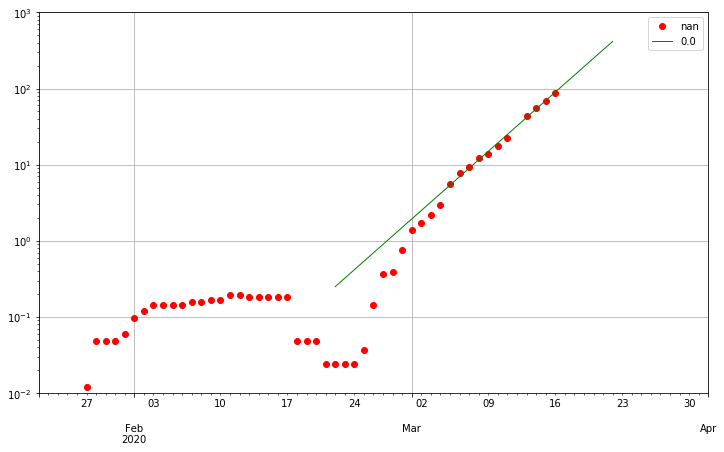

In [31]:
plt.close('all')
plt.rcParams['figure.figsize']=[12,7]
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['', '-', ':', '-.']) +
                  cycler(marker=['o','','','']))
plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)
combined.plot(kind='line',
                     logy=True,ylim=(0.01,1000),xlim=("2020-01-22","2020-04-01"),
                    grid=True)

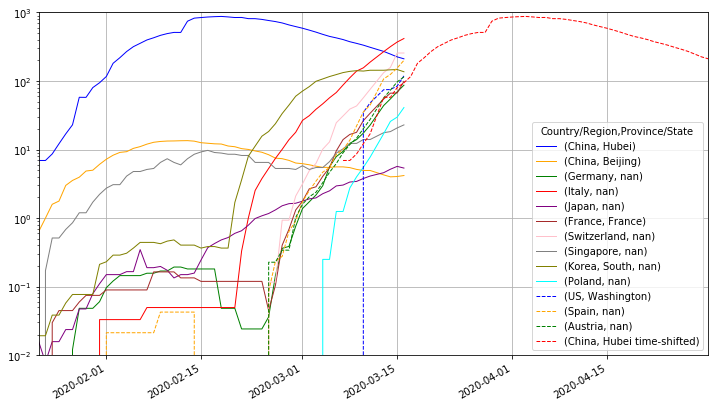

In [32]:
default_cycler = (cycler(color=['blue','orange','green','red','purple','brown','pink'
                                ,'gray','olive','cyan',
                               'blue','orange','green','red','purple','brown','pink'
                                ,'gray','olive','cyan']) +
                  cycler(linestyle=['-','-','-','-','-','-','-','-','-','-',
                                   '--','--','--','--','--','--','--','--','--','--']) +
                  cycler(marker=['','','','','','','','','','','','','','','','','','','','']))
plt.rc('axes', prop_cycle=default_cycler)
df6b.plot(kind='line',logy=True,ylim=(0.01,1000),grid=True)

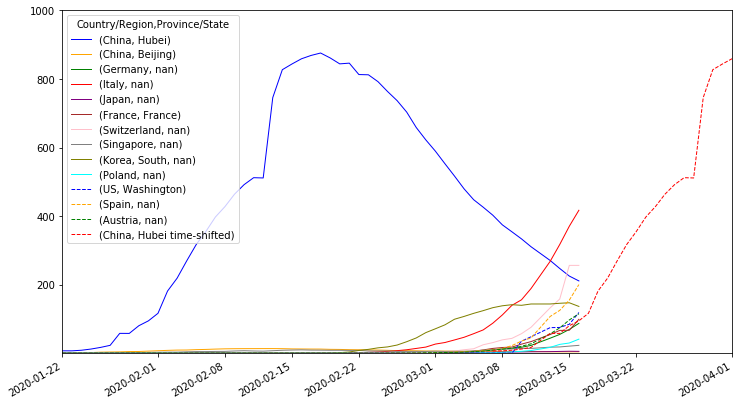

In [33]:
df6b.plot(kind='line',ylim=(0.01,1000),xlim=("2020-01-22","2020-04-01"))

In [34]:
df6.loc[:,('Poland',np.nan)].to_string()

'2020-01-22     0.00\n2020-01-23     0.00\n2020-01-24     0.00\n2020-01-25     0.00\n2020-01-26     0.00\n2020-01-27     0.00\n2020-01-28     0.00\n2020-01-29     0.00\n2020-01-30     0.00\n2020-01-31     0.00\n2020-02-01     0.00\n2020-02-02     0.00\n2020-02-03     0.00\n2020-02-04     0.00\n2020-02-05     0.00\n2020-02-06     0.00\n2020-02-07     0.00\n2020-02-08     0.00\n2020-02-09     0.00\n2020-02-10     0.00\n2020-02-11     0.00\n2020-02-12     0.00\n2020-02-13     0.00\n2020-02-14     0.00\n2020-02-15     0.00\n2020-02-16     0.00\n2020-02-17     0.00\n2020-02-18     0.00\n2020-02-19     0.00\n2020-02-20     0.00\n2020-02-21     0.00\n2020-02-22     0.00\n2020-02-23     0.00\n2020-02-24     0.00\n2020-02-25     0.00\n2020-02-26     0.00\n2020-02-27     0.00\n2020-02-28     0.00\n2020-02-29     0.00\n2020-03-01     0.00\n2020-03-02     0.00\n2020-03-03     0.00\n2020-03-04     0.25\n2020-03-05     0.25\n2020-03-06     1.25\n2020-03-07     1.25\n2020-03-08     2.75\n2020-03-09  

In [ ]:
df6.loc[:,('Poland',np.nan)]

In [ ]:
df5.loc[:,('Mainland China','Anhui')] /= 9999999.
df5.head(3)

In [ ]:
df5.to_csv("all.csv")

In [ ]:
df6['idx'] = df6.reset_index().index
df6.tail(3)

In [ ]:
df6.to_csv("reduced.csv",sep='\t',header=False)

In [ ]:
df6.iterrows?

In [ ]:
hb = df6["Mainland China"]["Hubei"]
hb.index = pd.date_range(start="2020-02-22",periods=hb.size)
hb.head(3)

In [ ]:
hb.index = pd.DatetimeIndex?

In [ ]:
pd.date_range(start="2020-01-22",periods=5)

In [ ]:
fit = pd.Series(np.exp(np.arange(0,10,1)/8))
fit.index = pd.date_range(start="2020-02-22",periods=fit.size)
fit

In [ ]:
3.9*np.log(10.)